In [1]:
import numpy as np
import pandas as pd
from sklearn import svm, datasets

import matplotlib.pyplot as plt

In [2]:
input_file="Ktable7.csv"
#import file

In [3]:
df=pd.read_csv(input_file)

In [4]:
df.head(10)
#show first 10 rows

,ID,RPM,Vibration,Stas
0,1,498,604,faulty
1,2,517,594,faulty
2,3,541,574,faulty
3,4,555,587,faulty
4,5,572,537,faulty
5,6,600,553,faulty
6,7,621,482,faulty
7,8,632,539,faulty
8,9,656,476,faulty
9,10,653,554,faulty


In [5]:
df.describe()
#show basic stats

,ID,RPM,Vibration
count,68.00000,68.000000,68.000000
mean,34.50000,742.220588,380.705882
std,19.77372,134.746068,121.897321
min,1.00000,498.000000,121.000000
25%,17.75000,652.750000,300.000000
50%,34.50000,740.500000,389.000000
75%,51.25000,833.750000,477.000000
max,68.00000,1002.000000,604.000000


In [6]:
df.RPM.astype(int)
#convert RPM to proper data(int)

0      498
1      517
2      541
3      555
4      572
      ... 
63     916
64     950
65     956
66     973
67    1002
Name: RPM, Length: 68, dtype: int32

In [7]:
X=df[['RPM','Vibration']]
y=df[['Stas']]
#inputs are RPM and Vibration; Stas is the target

In [8]:
#Method 1: convert categorical variables like Stas to numerical
from sklearn.preprocessing import LabelEncoder
numbers=LabelEncoder()
y_num=numbers.fit_transform(df['Stas'].astype('str'))


In [9]:
#Method 2 converting categorical variables to numerical
def score_to_numeric(x):
    if x=='good':
        return 1
    if x=='faulty':
        return 0
y_num = df['Stas'].apply(score_to_numeric)

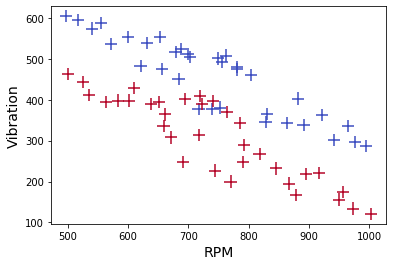

In [10]:
#visualization distribution for data
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(X.RPM, X.Vibration, marker='+', s=150, linewidths=4,
        c=y_num, cmap=plt.cm.coolwarm)
plt.xlabel('RPM', fontsize=14)
plt.ylabel('Vibration', fontsize=14)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=145)

In [13]:
from sklearn import svm
# Design the model
clf = svm.SVC(kernel='linear')
#clf = svm.LinearSVC(C=1)
clf.fit(X, y)

C:\Users\rothg\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [14]:
# get number of support vectors for each class
clf.n_support_ 
# get indices of support vectors
clf.support_ 

array([ 6, 15, 16, 19, 24, 47, 49, 50, 52, 54, 56])

In [15]:
y_predict = clf.predict(X)

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_predict)

array([[31,  3],
       [ 2, 32]], dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_predict)*100

92.64705882352942

In [18]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


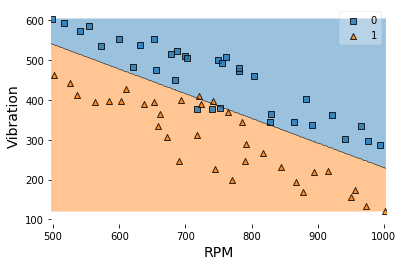

In [19]:
from mlxtend.plotting import plot_decision_regions

clf = svm.SVC(kernel='linear')
clf.fit(X, y_num) 

# pip install mlxtend  
# Plot Decision Region using mlxtend's awesome plotting function
plot_decision_regions(X=np.array(X), y=np.array(y_num), clf=clf, legend=1)
plt.xlabel('RPM', fontsize=14)
plt.ylabel('Vibration', fontsize=14)
plt.show()